In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("data\\housePrice.csv")
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [3]:
from sklearn.preprocessing import LabelEncoder
def cleanData(csv):
    # remove row that doesn't have address
    csv.dropna(subset=['Address'], inplace=True)
    # if area isn't int then convert to int or replace with NAN
    csv['Area'] = pd.to_numeric(csv['Area'], errors='coerce')
    # remove cells that is Empty(NAN)
    csv.dropna(subset=['Area'], inplace=True)
    # remove cells that have more than 1000 meter**2
    csv = csv[csv['Area'] < 1000]

    bool_to_int = ['Parking' , 'Warehouse' ,'Elevator']
    for col in bool_to_int:
        csv[col] = csv[col].astype(int)
    # 1dolor = 150_000 toman
    csv['Price(USD)'] = csv['Price(USD)'] * 5
    # convert address to int
    csv['Address'] = LabelEncoder().fit_transform(csv['Address'])
    return csv

In [4]:
df = cleanData(df)

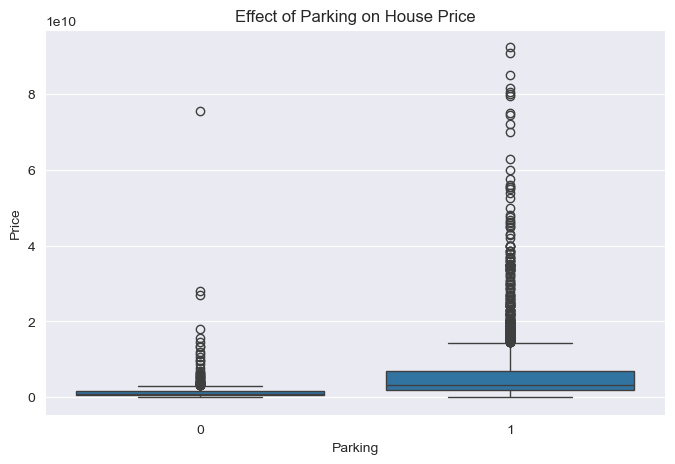

In [5]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x='Parking', y='Price', data=df)
plt.title('Effect of Parking on House Price')
plt.show()

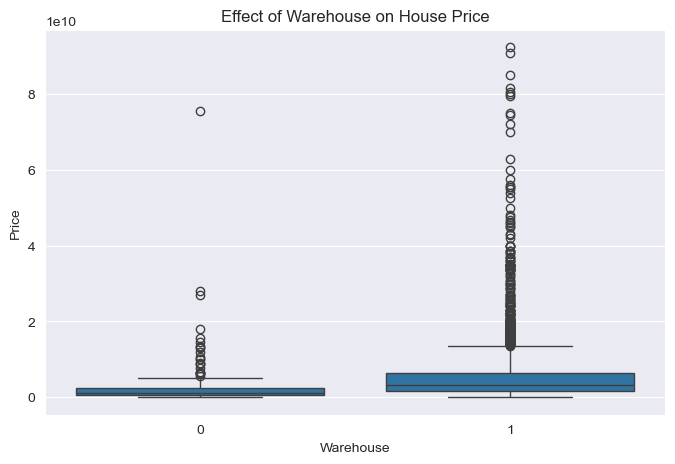

In [6]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Warehouse', y='Price', data=df)
plt.title('Effect of Warehouse on House Price')
plt.show()

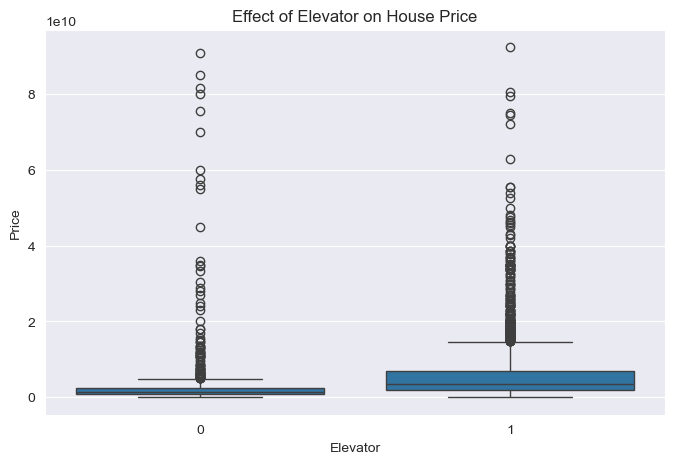

In [7]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Elevator', y='Price', data=df)
plt.title('Effect of Elevator on House Price')
plt.show()

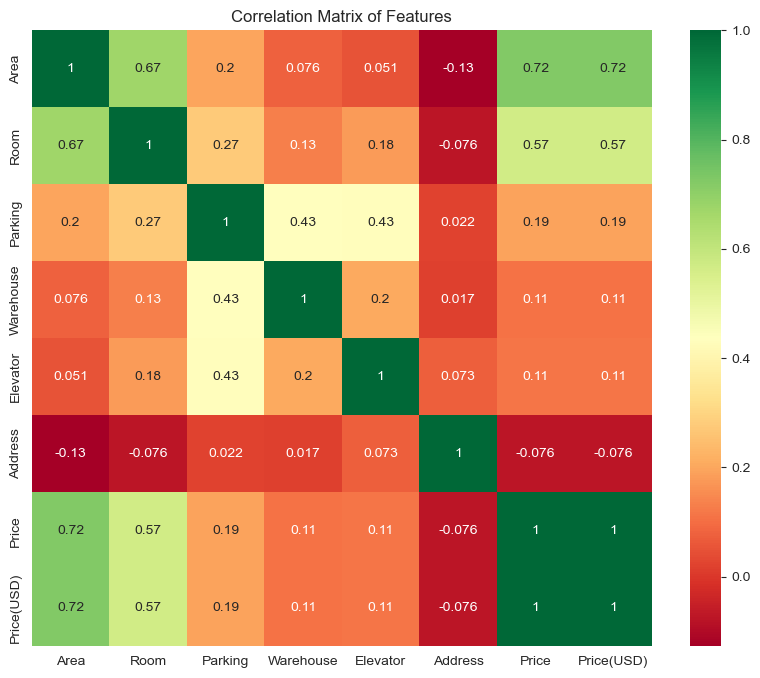

In [8]:
# I think parking and Warehouse sns box are the same
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
plt.title('Correlation Matrix of Features')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

# independent values
X = df[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address']]

y = df['Price']
# 80% for train, 20% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# degree=2
poly = PolynomialFeatures(degree=2, include_bias=False)

# this work make the all invalid combination of independent values
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [13]:
clf = LinearRegression()
clf.fit(X_train_poly, y_train)

# print coef and intercept
print('Coefficients:', clf.coef_)
print('Intercept:', clf.intercept_)

Coefficients: [ 5.73424651e+07 -5.24003865e+09  2.79210932e+08 -9.55395917e+07
  3.86119886e+08  4.93376024e+06 -8.74348779e+04  2.56617975e+07
 -5.40755897e+07  8.23383998e+06  5.05596328e+07  1.39269781e+05
  2.21000869e+08  1.06151264e+09  1.39412567e+09 -1.02665265e+09
 -6.50186221e+06  2.79210932e+08  8.05994878e+08  4.53106045e+08
  9.14322295e+06 -9.55395917e+07 -9.13778877e+08 -2.08105320e+07
  3.86119886e+08 -1.82607515e+07  1.01012564e+05]
Intercept: 475274770.6813679


In [14]:
from sklearn.metrics import r2_score
# test the model
y_pred = clf.predict(X_test_poly)
print(f"R2-score: {r2_score(y_test, y_pred):.2f}")

R2-score: 0.72


In [17]:
from sklearn.linear_model import LinearRegression

# I want to test linear model too
lr_model = LinearRegression()

# train
lr_model.fit(X_train, y_train)

print('--- Linear Regression Results ---')
print('Coefficients:', lr_model.coef_)
print('Intercept:', lr_model.intercept_)

--- Linear Regression Results ---
Coefficients: [ 7.27886304e+07  1.35139496e+09 -2.78651315e+08  1.33978149e+09
  9.93157718e+08  8.92276042e+05]
Intercept: -7106182423.277992


In [19]:
from sklearn.metrics import r2_score

y_pred = lr_model.predict(X_test)
print(f"R2-score: {r2_score(y_test, y_pred):.2f}")

R2-score: 0.53


In [21]:
# I want to test degree 3 model too
poly3 = PolynomialFeatures(degree=3)
X_train_poly3 = poly3.fit_transform(X_train)
X_test_poly3 = poly3.transform(X_test)

# train model
clf3 = LinearRegression()
clf3.fit(X_train_poly3, y_train)

# test
y_pred3 = clf3.predict(X_test_poly3)
score3 = r2_score(y_test, y_pred3)

print(f"R2-score with Degree 3: {score3:.2f}")

R2-score with Degree 3: 0.73
